### Computational Task no.3

Group3: Mohammad, Danial, Megan and Youssaf 

You will be implementing Yule process, where the number of births is proportional to the size of the population, and a non-homogeneous perturbation of the process modeling, e.g. seasonal variability in the birth rate:
1. Implement the Yule process with fixed rate  $\nu = 0.4n$, where n is the size of the population.
2. Implement the Yule process with rate $\nu(t) = 0.4n + 2 sin(t)$.
Simulate the population on the time interval [0, 100]. In all cases show the distribution of population sizes at t = 10, 50 and 100. Start with n(0) = 1.

Implement τ -leaping by doing the following: Discretize the time into intervals of length τ > 0, and assume that the birth rate in each interval is constant and determined by the population size at the beginning of the interval. Thus if the population at some time t = jτ equals n(t), then the number of births in the interval [jτ,(j + 1)τ) is approximated by a Poisson distribution with parameter τν(t). Note that ν(t) depends on population size at time t.

In [52]:
import numpy as np
import matplotlib.pyplot as plt 
from numba import jit


@jit(nopython=True)
def Sim_func(maxtime,tau, seasonal,size, i_size):
    ns = 0
    t  = 0
    x    = np.zeros(size)
    time = np.zeros(size)
    x[0] = i_size
    while t <= maxtime:
        if seasonal:
            v = 0.4*x[ns]+(2*np.sin(t))
            if v <0:
                v=0
        else:  
            v = 0.4*x[ns]
        r= np.random.poisson(lam = tau*v)
        x[ns+1] = x[ns] + r
        time[ns+1] = tau +time[ns]
        t = tau+t
        ns = ns+1
        if ns == size-1:
            break
        
    return time[0:ns], x[0:ns]


In [28]:
import numpy as np
import matplotlib.pyplot as plt 
from numba import jit

x1    = np.zeros(200001)
time1 = np.zeros(200001)

for i in range(100):
    tt,xx = Sim_func(maxtime = 20, tau = 0.0001,seasonal= False,size=100000000,i_size=1)
    x1    = xx+x1
    time1 = tt+time1
    

x1 = np.divide(x1, 100)
time1 = np.divide(time1, 100)


Deterministic equation for $v = 0.4n$; $dn/dt = 0.4n$; $x(t) = e^{0.4t}$ 

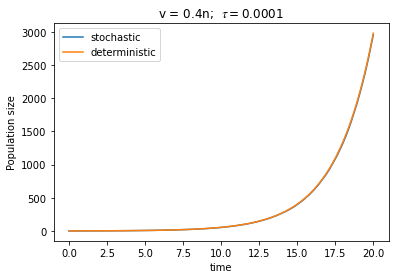

In [66]:


xax = np.arange(0, 20, 0.0001)
det = np.exp(0.4*xax)

plt.plot(time1,x1)
plt.plot(xax, det)
plt.legend(['stochastic', 'deterministic']);
plt.xlabel("time")
plt.ylabel("Population size");
plt.title("v = 0.4n;  $𝜏 = 0.0001$");

In [41]:
x2    = np.zeros(200001)
time2 = np.zeros(200001)

for i in range(100):
    tt2,xx2 = Sim_func(maxtime = 20, tau = 0.0001,seasonal= True,size=100000000,i_size=1)
    x2    = xx2+x2
    time2 = tt2+time2
    

x2 = np.divide(x2, 100)
time2 = np.divide(time2, 100)



Deterministic equation for $v = 0.4n + 2sin(t)$:    $x(t) = -2(0.86cos(t) + 0.34 sin(t))+2.72e^{0.4t}$ 

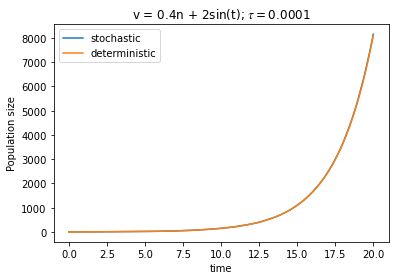

In [65]:
xax2 = np.arange(0, 20, 0.0001)
det2 = -2*(0.86*np.cos(xax2) + 0.34*np.sin(xax2))+2.72*np.exp(0.4*xax)
plt.plot(time2,x2)
plt.plot(xax2, det2)
plt.legend(['stochastic', 'deterministic']);
plt.xlabel("time")
plt.ylabel("Population size");
plt.title("v = 0.4n + 2sin(t); $𝜏 = 0.0001$");

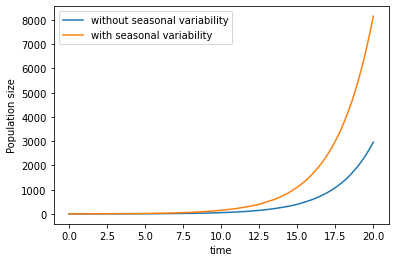

In [51]:
plt.plot(time1,x1)
plt.plot(time2,x2)
plt.xlabel("time")
plt.ylabel("Population size");
plt.legend(['without seasonal variability', 'with seasonal variability']);

In [2]:
y1 = np.zeros(1000)
y2 = np.zeros(1000)
y3 = np.zeros(1000)


for j in range(1000):
    times,x = Sim_func(maxtime = 101, tau = 0.0001,seasonal= False,size=100000000,i_size=1)
    t10 = np.where(times.astype(int) == 10)[0][0]
    t50 = np.where(times.astype(int) == 50)[0][0]
    t100= np.where(times.astype(int) == 100)[0][0]
    y1[j]  = x[t10]
    y2[j]  = x[t50]
    y3[j]  = x[t100]
 

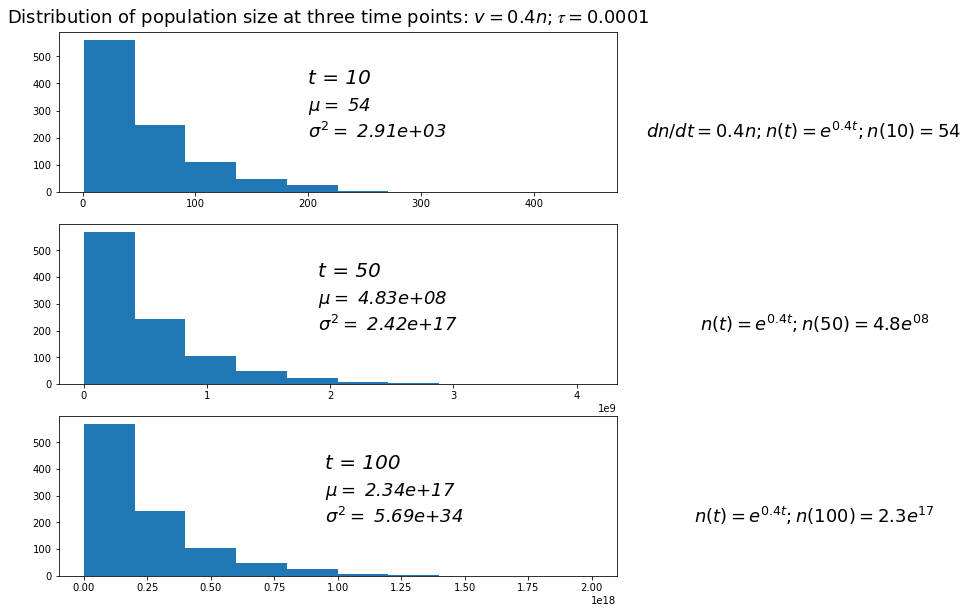

In [35]:
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 10)
fig.suptitle('Distribution of population size at three time points: $v= 0.4n ; 𝜏 = 0.0001$',x = .5,y=0.9, size  = 18,va ='center' , ha = 'center')
axs[0].text(200, 400, "t = 10", style = 'italic',size =20)
axs[0].text(200, 300, "$\mu = $ 54", style = 'italic',size =18)
axs[0].text(200, 200, "$\sigma^2 = $ 2.91e+03", style = 'italic',size =18)
axs[0].text(500, 200, "$ dn/dt = 0.4n; n(t) = e^{0.4t}; n(10) = 54 $", style = 'italic',size =18)
axs[1].text(1.9*10**9, 400, "t = 50", style = 'italic',size =20)
axs[1].text(1.9*10**9, 300, "$\mu = $ 4.83e+08", style = 'italic',size =18)
axs[1].text(1.9*10**9, 200, "$\sigma^2 = $ 2.42e+17", style = 'italic',size =18)
axs[1].text(5*10**9, 200, "$ n(t) = e^{0.4t}; n(50) = 4.8e^{08} $", style = 'italic',size =18)
axs[2].text(0.95*10**18, 400, "t = 100", style = 'italic',size =20)
axs[2].text(0.95*10**18, 300, "$\mu = $ 2.34e+17", style = 'italic',size =18)
axs[2].text(0.95*10**18, 200, "$\sigma^2 = $ 5.69e+34", style = 'italic',size =18)
axs[2].text(2.4*10**18, 200, "$ n(t) = e^{0.4t}; n(100) = 2.3e^{17} $", style = 'italic',size =18)
axs[0].hist(y1)
axs[1].hist(y2)
axs[2].hist(y3);

In [36]:
z1 = np.zeros(1000)
z2 = np.zeros(1000)
z3 = np.zeros(1000)


for j in range(1000):
    times,x = Sim_func(maxtime = 101, tau = 0.0001,seasonal= True,size=100000000,i_size=1)
    t10 = np.where(times.astype(int) == 10)[0][0]
    t50 = np.where(times.astype(int) == 50)[0][0]
    t100= np.where(times.astype(int) == 100)[0][0]
    z1[j]  = x[t10]
    z2[j]  = x[t50]
    z3[j]  = x[t100]
 

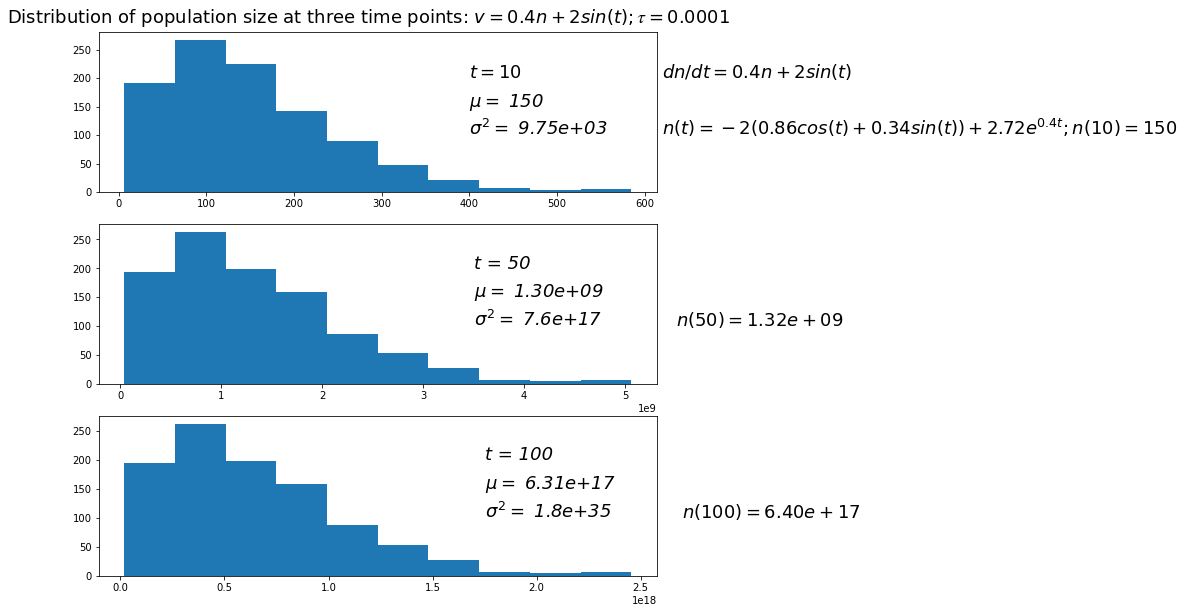

In [147]:
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 10)


fig.suptitle('Distribution of population size at three time points: $v= 0.4n + 2sin(t); 𝜏 = 0.0001$',x = .5,y=0.9, size  = 18,va ='center' , ha = 'center')
axs[0].text(400, 200, "$t = 10$", style = 'italic',size =18)
axs[0].text(400, 150, "$\mu = $ 150", style = 'italic',size =18)
axs[0].text(400, 100, "$\sigma^2 = $ 9.75e+03", style = 'italic',size =18)
axs[0].text(620, 200, "$dn/dt = 0.4n + 2sin(t)$", style = 'italic',size =18)
axs[0].text(620, 100, "$n(t) = -2(0.86cos(t) + 0.34 sin(t))+2.72e^{0.4t}; n(10) = 150$", style = 'italic',size =18)
axs[1].text(3.5*10**9, 200, "t = 50", style = 'italic',size =18)
axs[1].text(3.5*10**9, 150, "$\mu = $ 1.30e+09", style = 'italic',size =18)
axs[1].text(3.5*10**9, 100, "$\sigma^2 = $ 7.6e+17", style = 'italic',size =18)
axs[1].text(5.5*10**9, 100, "$n(50) = 1.32e+09$", style = 'italic',size =18)
axs[2].text(1.75*10**18, 200, "t = 100", style = 'italic',size =18)
axs[2].text(1.75*10**18, 150, "$\mu = $ 6.31e+17", style = 'italic',size =18)
axs[2].text(1.75*10**18, 100, "$\sigma^2 = $ 1.8e+35", style = 'italic',size =18)
axs[2].text(2.7*10**18, 100, "$n(100) = 6.40e+17$", style = 'italic',size =18)
axs[0].hist(z1)
axs[1].hist(z2)
axs[2].hist(z3);

In [56]:
import numpy as np
import matplotlib.pyplot as plt 
from numba import jit

xst   = np.zeros(200)
tst   = np.zeros(200)

for i in range(100):
    tt,xx = Sim_func(maxtime = 20, tau = 0.1,seasonal= False,size=100000000,i_size=1)
    xst    = xx+xst
    tst    = tt+tst
    

xst = np.divide(xst, 100)
tst = np.divide(tst, 100)



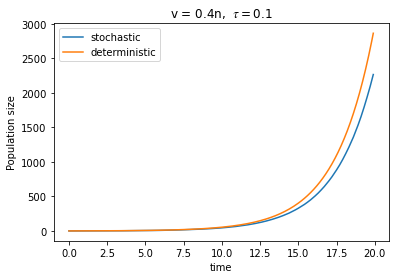

In [62]:

xaxst = np.arange(0, 20, 0.1)
detst = np.exp(0.4*xaxst)

plt.plot(tst, xst)
plt.plot(xaxst, detst)
plt.legend(['stochastic', 'deterministic']);
plt.xlabel("time")
plt.ylabel("Population size");
plt.title("v = 0.4n,  $𝜏 = 0.1$");

In [63]:
import numpy as np
import matplotlib.pyplot as plt 
from numba import jit

xst2   = np.zeros(200)
tst2   = np.zeros(200)

for i in range(100):
    tt,xx = Sim_func(maxtime = 20, tau = 0.1,seasonal= True,size=100000000,i_size=1)
    xst2    = xx+xst2
    tst2    = tt+tst2
    

xst2 = np.divide(xst2, 100)
tst2 = np.divide(tst2, 100)

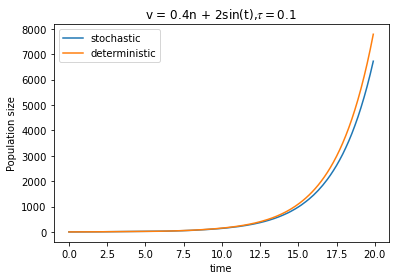

In [70]:
xaxst2 = np.arange(0, 20, 0.1)
detst2 = -2*(0.86*np.cos(xaxst2) + 0.34*np.sin(xaxst2))+2.72*np.exp(0.4*xaxst2)
plt.plot(tst2,xst2)
plt.plot(xaxst2, detst2)
plt.legend(['stochastic', 'deterministic']);
plt.xlabel("time")
plt.ylabel("Population size");
plt.title("v = 0.4n + 2sin(t),$𝜏 = 0.1$");


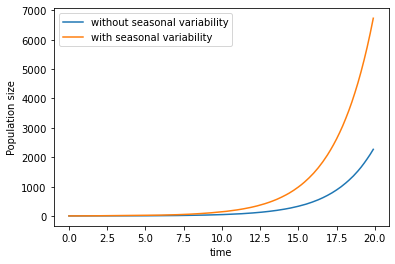

In [71]:

plt.plot(tst,xst)
plt.plot(tst2,xst2)
plt.xlabel("time")
plt.ylabel("Population size");
plt.legend(['without seasonal variability', 'with seasonal variability']);

In [77]:
y11 = np.zeros(1000)
y22 = np.zeros(1000)
y33 = np.zeros(1000)


for j in range(1000):
    times,x = Sim_func(maxtime = 101, tau = 0.1,seasonal= False,size=100000000,i_size=1)
    t10 = np.where(times.astype(int) == 10)[0][0]
    t50 = np.where(times.astype(int) == 50)[0][0]
    t100= np.where(times.astype(int) == 100)[0][0]
    y11[j]  = x[t10]
    y22[j]  = x[t50]
    y33[j]  = x[t100]
 

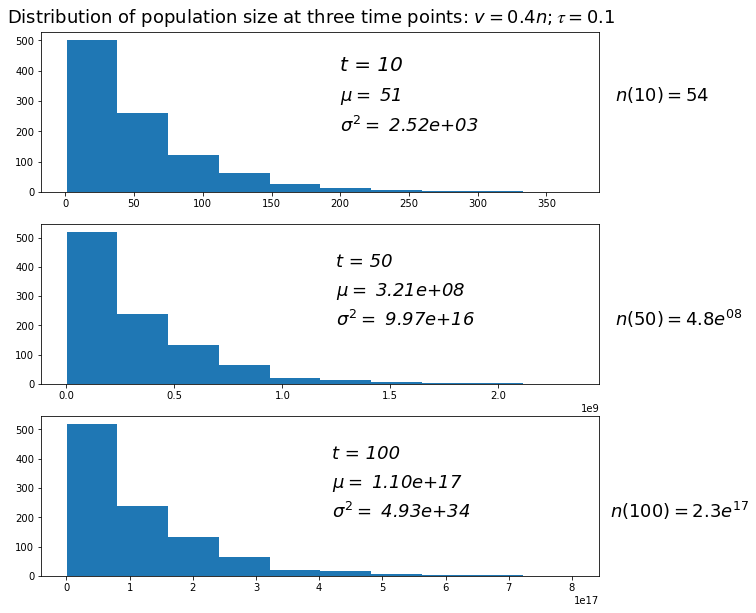

In [117]:
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 10)
fig.suptitle('Distribution of population size at three time points: $v= 0.4n ; 𝜏 = 0.1$',x = .5,y=0.9, size  = 18,va ='center' , ha = 'center')
axs[0].text(200, 400, "t = 10", style = 'italic',size =20)
axs[0].text(200, 300, "$\mu = $ 51", style = 'italic',size =18)
axs[0].text(200, 200, "$\sigma^2 = $ 2.52e+03", style = 'italic',size =18)
axs[0].text(400, 300, "$n(10) = 54$", style = 'italic',size =18)
axs[1].text(1.25*10**9, 400, "t = 50", style = 'italic',size =18)
axs[1].text(1.25*10**9, 300, "$\mu = $ 3.21e+08", style = 'italic',size =18)
axs[1].text(1.25*10**9, 200, "$\sigma^2 = $ 9.97e+16", style = 'italic',size =18)
axs[1].text(2.54*10**9, 200, "$n(50) = 4.8e^{08} $", style = 'italic',size =18)
axs[2].text(4.2*10**17, 400, "t = 100", style = 'italic',size =18)
axs[2].text(4.2*10**17, 300, "$\mu = $ 1.10e+17", style = 'italic',size =18)
axs[2].text(4.2*10**17, 200, "$\sigma^2 = $ 4.93e+34", style = 'italic',size =18)
axs[2].text(8.6*10**17, 200, "$n(100) = 2.3e^{17} $", style = 'italic',size =18)


axs[0].hist(y11)
axs[1].hist(y22)
axs[2].hist(y33);





In [118]:
z11 = np.zeros(1000)
z22 = np.zeros(1000)
z33 = np.zeros(1000)


for j in range(1000):
    times,x = Sim_func(maxtime = 101, tau = 0.1,seasonal= True,size=100000000,i_size=1)
    t10 = np.where(times.astype(int) == 10)[0][0]
    t50 = np.where(times.astype(int) == 50)[0][0]
    t100= np.where(times.astype(int) == 100)[0][0]
    z11[j]  = x[t10]
    z22[j]  = x[t50]
    z33[j]  = x[t100]
 

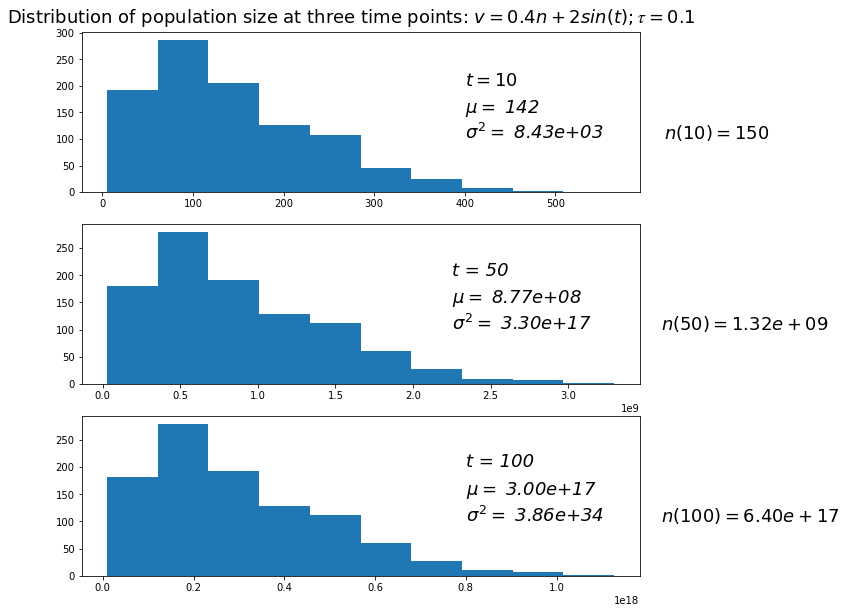

In [148]:
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 10)
fig.suptitle('Distribution of population size at three time points: $v= 0.4n + 2sin(t); 𝜏 = 0.1$',x = .5,y=0.9, size  = 18,va ='center' , ha = 'center')
axs[0].text(400, 200, "$t = 10$", style = 'italic',size =18)
axs[0].text(400, 150, "$\mu = $ 142", style = 'italic',size =18)
axs[0].text(400, 100, "$\sigma^2 = $ 8.43e+03", style = 'italic',size =18)
axs[0].text(620, 100, "$n(10) = 150$", style = 'italic',size =18)
axs[1].text(2.25*10**9, 200, "t = 50", style = 'italic',size =18)
axs[1].text(2.25*10**9, 150, "$\mu = $ 8.77e+08", style = 'italic',size =18)
axs[1].text(2.25*10**9, 100, "$\sigma^2 = $ 3.30e+17", style = 'italic',size =18)
axs[1].text(3.6*10**9, 100, "$n(50) = 1.32e+09$", style = 'italic',size =18)
axs[2].text(0.8*10**18, 200, "t = 100", style = 'italic',size =18)
axs[2].text(0.8*10**18, 150, "$\mu = $ 3.00e+17", style = 'italic',size =18)
axs[2].text(0.8*10**18, 100, "$\sigma^2 = $ 3.86e+34", style = 'italic',size =18)
axs[2].text(1.23*10**18, 100, "$n(100) = 6.40e+17$", style = 'italic',size =18)



axs[0].hist(z11)
axs[1].hist(z22)
axs[2].hist(z33);